In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
#Przeplatanie wierszy

# Link do modelu
# https://drive.google.com/drive/folders/1LuQYuo_tI5v1bLIIgsDcE7hD4HJjB6mY?usp=sharing


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.15.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [5]:
#Dodanie dysku google do colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
# Wczytywane dane muszą być kwadratowe np. 512x512
# Na zjęciu powinna znajdować się tylko sama twarz

im_1 = Image.open('/content/drive/MyDrive/Multimedia/test/p_1.png')
im_2 = Image.open('/content/drive/MyDrive/Multimedia/test/p_2.png')
im_3 = Image.open('/content/drive/MyDrive/Multimedia/Adam/adam_1.jpg').convert('L')
im_4 = Image.open('/content/drive/MyDrive/Multimedia/Adam/adam_2.jpg').convert('L')

# Zmiana formatu z AxA na 64x64
#con_2 = con.resize((int(64), int(64)))



arr_im_1 = np.array(im_1)
arr_im_2 = np.array(im_2)

arr_im_3 = np.array(im_3)
arr_im_4 = np.array(im_4)


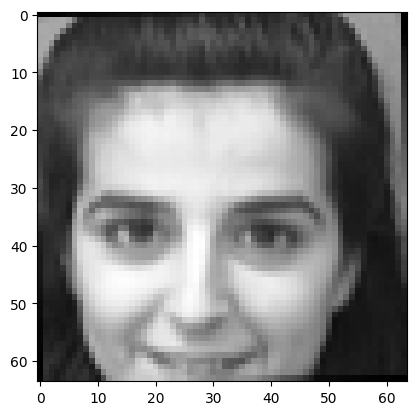

In [9]:
plt.imshow(arr_im_1, cmap = 'gray')

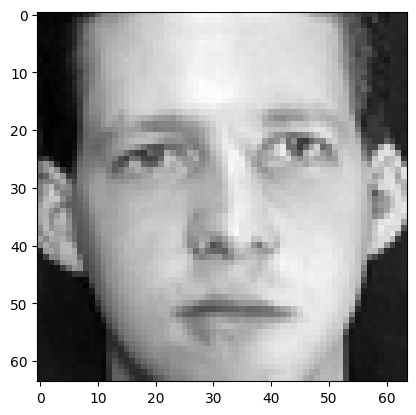

In [10]:
plt.imshow(arr_im_2, cmap = 'gray')

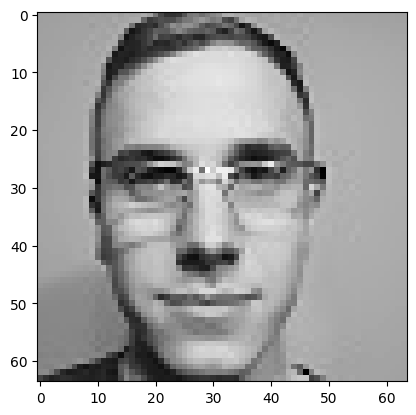

In [11]:
plt.imshow(arr_im_3, cmap = 'gray')

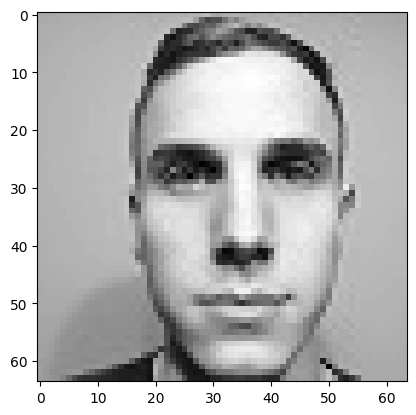

In [12]:
plt.imshow(arr_im_4, cmap = 'gray')

In [13]:
w, h = 64, 128
data = np.zeros((h, w), dtype=np.uint8)

a = 0

for x in range(len(arr_im_1[0])):
    x = 2*x
    data[x] = arr_im_1[a]
    data[x+1] = arr_im_2[a]
    a = a + 1

data_2 = np.zeros((h, w), dtype=np.uint8)

a = 0

for x in range(len(arr_im_1[0])):
    x = 2*x
    data_2[x] = arr_im_3[a]
    data_2[x+1] = arr_im_4[a]
    a = a + 1

In [14]:
images_test = []

arr_im = np.array(data)
arr_im = arr_im / 255.0
images_test.append(arr_im)


arr_im_2 = np.array(data_2)
arr_im_2 = arr_im_2 / 255.0
images_test.append(arr_im_2)


In [15]:
x_test = np.array(images_test)

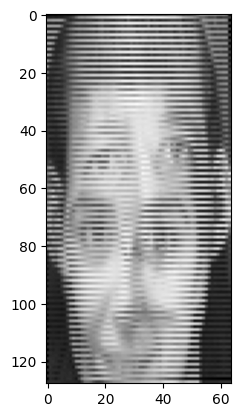

In [16]:
plt.imshow(x_test[0], cmap = 'gray')

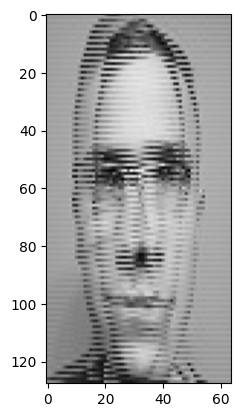

In [17]:
plt.imshow(x_test[1], cmap = 'gray')

In [18]:
model = models.Sequential()
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

In [20]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Multimedia/Model_przeplatane_wiersze.h5', compile=False)

In [21]:
predict_x = model.predict(x_test)
predictions = (predict_x > 0.5).astype("int32")

1/1 [==============================] - 1s 769ms/step


In [22]:
print(predictions)

[[0]
 [1]]
